# About

This is an example of using the iris dataset and constructing a classifier via a simple neural network. 
Pytorch is utilized to construct the layers of the network with linear layers in between. Progress of the train and test error are tracked as the model is trained.
 

# Loading Data

Here we are loading data directly into a pandas dataframe from a string that represents the Iris dataset. 

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/nardoguy14/jupyter_notebooks/main/datasets/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Cleaning Data

Here we're just checking for null values or missing values. However the dataset looks clean and complete without null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Unique Targets

We need to see the distinct set of target values the model can output. Here we take the dataframe strip out a series of the target that has a label of `species` then create a set out of it.

In [6]:
labels = df[['species']]['species']
distinct_labels = labels.unique()
distinct_labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Features

We need to take the dataframe and just keep the data that relates to the features without the labels.

In [7]:
features = df.drop(columns=['species'])
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Defining the Model

We use PyTorch here to define a linear model class with 2 hidden layers. 

In [8]:
!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim

class IrisClassifier(nn.Module):
    def __init__(self):
        super(IrisClassifier, self).__init__()
        # Define the layers of your neural network
        self.fc1 = nn.Linear(4, 64)  # Input size: 4, Output size: 64
        self.fc2 = nn.Linear(64, 32)  # Input size: 64, Output size: 32
        self.fc3 = nn.Linear(32, 3)   # Input size: 32, Output size: 3 (number of classes)

    def forward(self, x):
        # Define the forward pass of your neural network
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation function for the final layer in this example
        return x
    


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Construct Model, Loss Function, and Optimizer

We instantiate the model here and setup a loss function to use with a optimizer that has an appropriate learning rate. We also turn the dataframe features into a tensor of inputs.

In [9]:
# Create an instance of the classifier
model = IrisClassifier()

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

inputs = torch.tensor(features.values)
inputs = inputs.to(torch.float)
inputs

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

# Labels to Numerical Values

We use a helper library called `scikit-learn` to map our alphanumerical labels to numerical labels. We then construct our expected mapped outputs from a dataframe series to a tensor of numerical long values.

In [10]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mapped_labels = label_encoder.fit_transform(labels)
outputs = torch.tensor(mapped_labels)
outputs =  outputs.to(torch.long)
outputs


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Defining/Constructing the Dataset & Dataloaders

PyTorch uses dataset and dataloaders to feed the model data from. Here we define a class for our dataset and also split our dataset into a training set and a testing set. We then load the two sets into dataloaders that will be used during training. The loaders define the batch size that will be used for each epoch of the training.

In [11]:
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split


class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = CustomDataset(inputs, outputs)
train_indices, test_indices = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

train_data_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)


loss_array = []
test_err_arr = []
print("done!")


done!


# Defining Test and Train

The train loop and test loops are defined here for pytorch where we use the model for either training or testing and outputing the current loss for both training and testing.

In [12]:
def test_loop(dataloader, model, loss_fn) -> list[float]:
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    test_err_arr = []

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        i = 1
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            i += 1
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    test_err_arr.append(test_loss)
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_err_arr

def train_loop(train_data_loader, model, criterion):
    loss_array_in = []
    model.train()
    running_loss = 0.0
    for ins, outs in train_data_loader:
        optimizer.zero_grad()
        obs_outs = model(ins)
        loss = criterion(obs_outs, outs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_data_loader)
    loss_array_in.append(train_loss)
    return loss_array_in
print("done!")

done!


# Running Training & Testing

Now that we defined the functions to train and test we run a taining of 20 epochs where we train measure the loss then test and measure the test loss. 

In [13]:
num_epochs = 20
for epoch in range(num_epochs):
    
    results = train_loop(train_data_loader, model, criterion)
    for i in results:
        loss_array.append(i)

    results = test_loop(test_data_loader, model, criterion)
    for i in results:
        test_err_arr.append(i)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_array[-1]}')


Test Error: 
 Accuracy: 40.0%, Avg loss: 1.081893 

Epoch [1/20], Loss: 1.116767942905426
Test Error: 
 Accuracy: 46.7%, Avg loss: 1.048822 

Epoch [2/20], Loss: 1.0834330022335052
Test Error: 
 Accuracy: 30.0%, Avg loss: 1.033564 

Epoch [3/20], Loss: 1.047450914978981
Test Error: 
 Accuracy: 50.0%, Avg loss: 0.985492 

Epoch [4/20], Loss: 1.0213819096485774
Test Error: 
 Accuracy: 56.7%, Avg loss: 0.946188 

Epoch [5/20], Loss: 0.9826554556687673
Test Error: 
 Accuracy: 83.3%, Avg loss: 0.908523 

Epoch [6/20], Loss: 0.9449802190065384
Test Error: 
 Accuracy: 83.3%, Avg loss: 0.864856 

Epoch [7/20], Loss: 0.9013162354628245
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.825809 

Epoch [8/20], Loss: 0.8599927177031835
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.768739 

Epoch [9/20], Loss: 0.8112937758366267
Test Error: 
 Accuracy: 70.0%, Avg loss: 0.715979 

Epoch [10/20], Loss: 0.7579562962055206
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.672486 

Epoch [11/20], Loss: 0.7079369425773621

# Results

We check the running test and train loss to be sure we are not overfitting and that our training loss does not drop dramatically fast compared to the test loss.

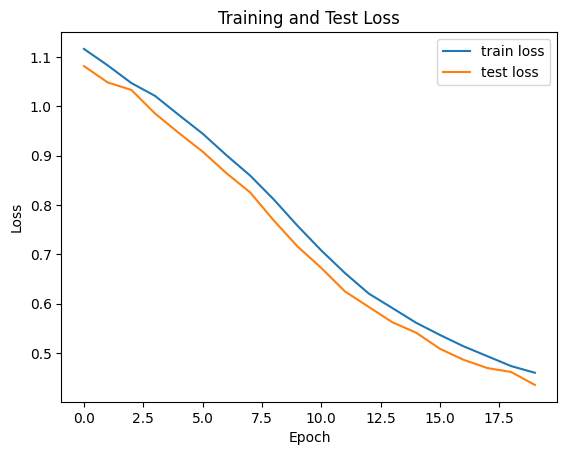

In [14]:
import matplotlib.pyplot as plt
plt.plot(loss_array, label="train loss")
plt.plot(test_err_arr, label="test loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()
